In [36]:
%matplotlib widget
from main import *
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Heaviside, sin, cos, pi
sp.init_printing()

In [37]:
Vin = 6
fs = 100e3 #Hz
D = 0.25
switch = cos(2 * pi * fs * t) - 1 + 2 * D

Vout = 1.5
Iout = 0.5

In [38]:
acTest = Solver.Circuit("buck")
acTest.element(
                    VoltageSource("Vin", {"V+" : "Vin", "V-" : Gnd}, V_t = Vin),
                    
                    Relay("S", {"V1" : "Vin", "V2" : "Vs", "V+" : "S", "V-" : Gnd}),                    
                    VoltageSource("Vs", {"V+" : "S", "V-" : Gnd}, V_t = switch),
                    
                    Diode("D1", {"Vp" : Gnd, "Vn" : "Vs"}, Vd = 0.6),
                    
                    Inductor("L1", {"V1" : "Vs", "V2" : "Vout"}, L = 5e-6, I0 = Iout),

                    Capacitor("C1", {"V1" : "Vout", "V2" : Gnd}, C = 10e-6, V0 = Vout),
                    
                    CurrentSource("Iout", {"V+" : "Vout", "V-" : Gnd}, I_t = -Iout),
                    #Resistor("Rout", {"V1" : "Vout", "V2" : Gnd}, R = 3),
)

{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}},
 'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(200000*pi*t) - 0.5}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 0, 'Vn': 'Vs'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vs', 'V2': 0}, 'values': {'R': 100000.0}},
 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 'Vout'}, 'values': {'L': 5e-06, 'I0': 0.5}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 1.5}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.5}}}

In [39]:
Solver.setMain("buck")
compiled = Solver.compile()

In [40]:
model = solveLaplace(compiled, 0.00005, tstep = 1e-9, debugLog = 1)

{I0_1, V1, I5_0, V2, I4_1, I5_1, I6_0, I1_3, I2_0, I1_0, I4_0, V0, I1_1, I7_1, I1_2, I2_1, I3_1, V3, I7_0, I3_0, I6_1, I0_0}
[Eq(I5_1 + I6_0 + I7_0, 0), Eq(I1_2 + I2_0, 0), Eq(I1_1 + I3_1 + I4_0 + I5_0, 0), Eq(I0_0 + I1_0, 0)]
{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}}, 'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}}, 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(200000*pi*t) - 0.5}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 0, 'Vn': 'Vs'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vs', 'V2': 0}, 'values': {'R': 100000.0}}, 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 'Vout'}, 'values': {'L': 5e-06, 'I0': 0.5}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}

In [41]:

print(compiled["nodes"])

S = compiled["nodes"]["S"]

Vs = compiled["nodes"]["Vs"]

Vin = compiled["nodes"]["Vin"]

Iin = compiled["currents"]["S"]["V1"]

Vout = compiled["nodes"]["Vout"]

IL = compiled["currents"]["L1"]["V1"]


{'Vout': V0, 'S': V1, 'Vs': V2, 'Vin': V3}


In [42]:
#printModel(model, var=t, measurments={IL})

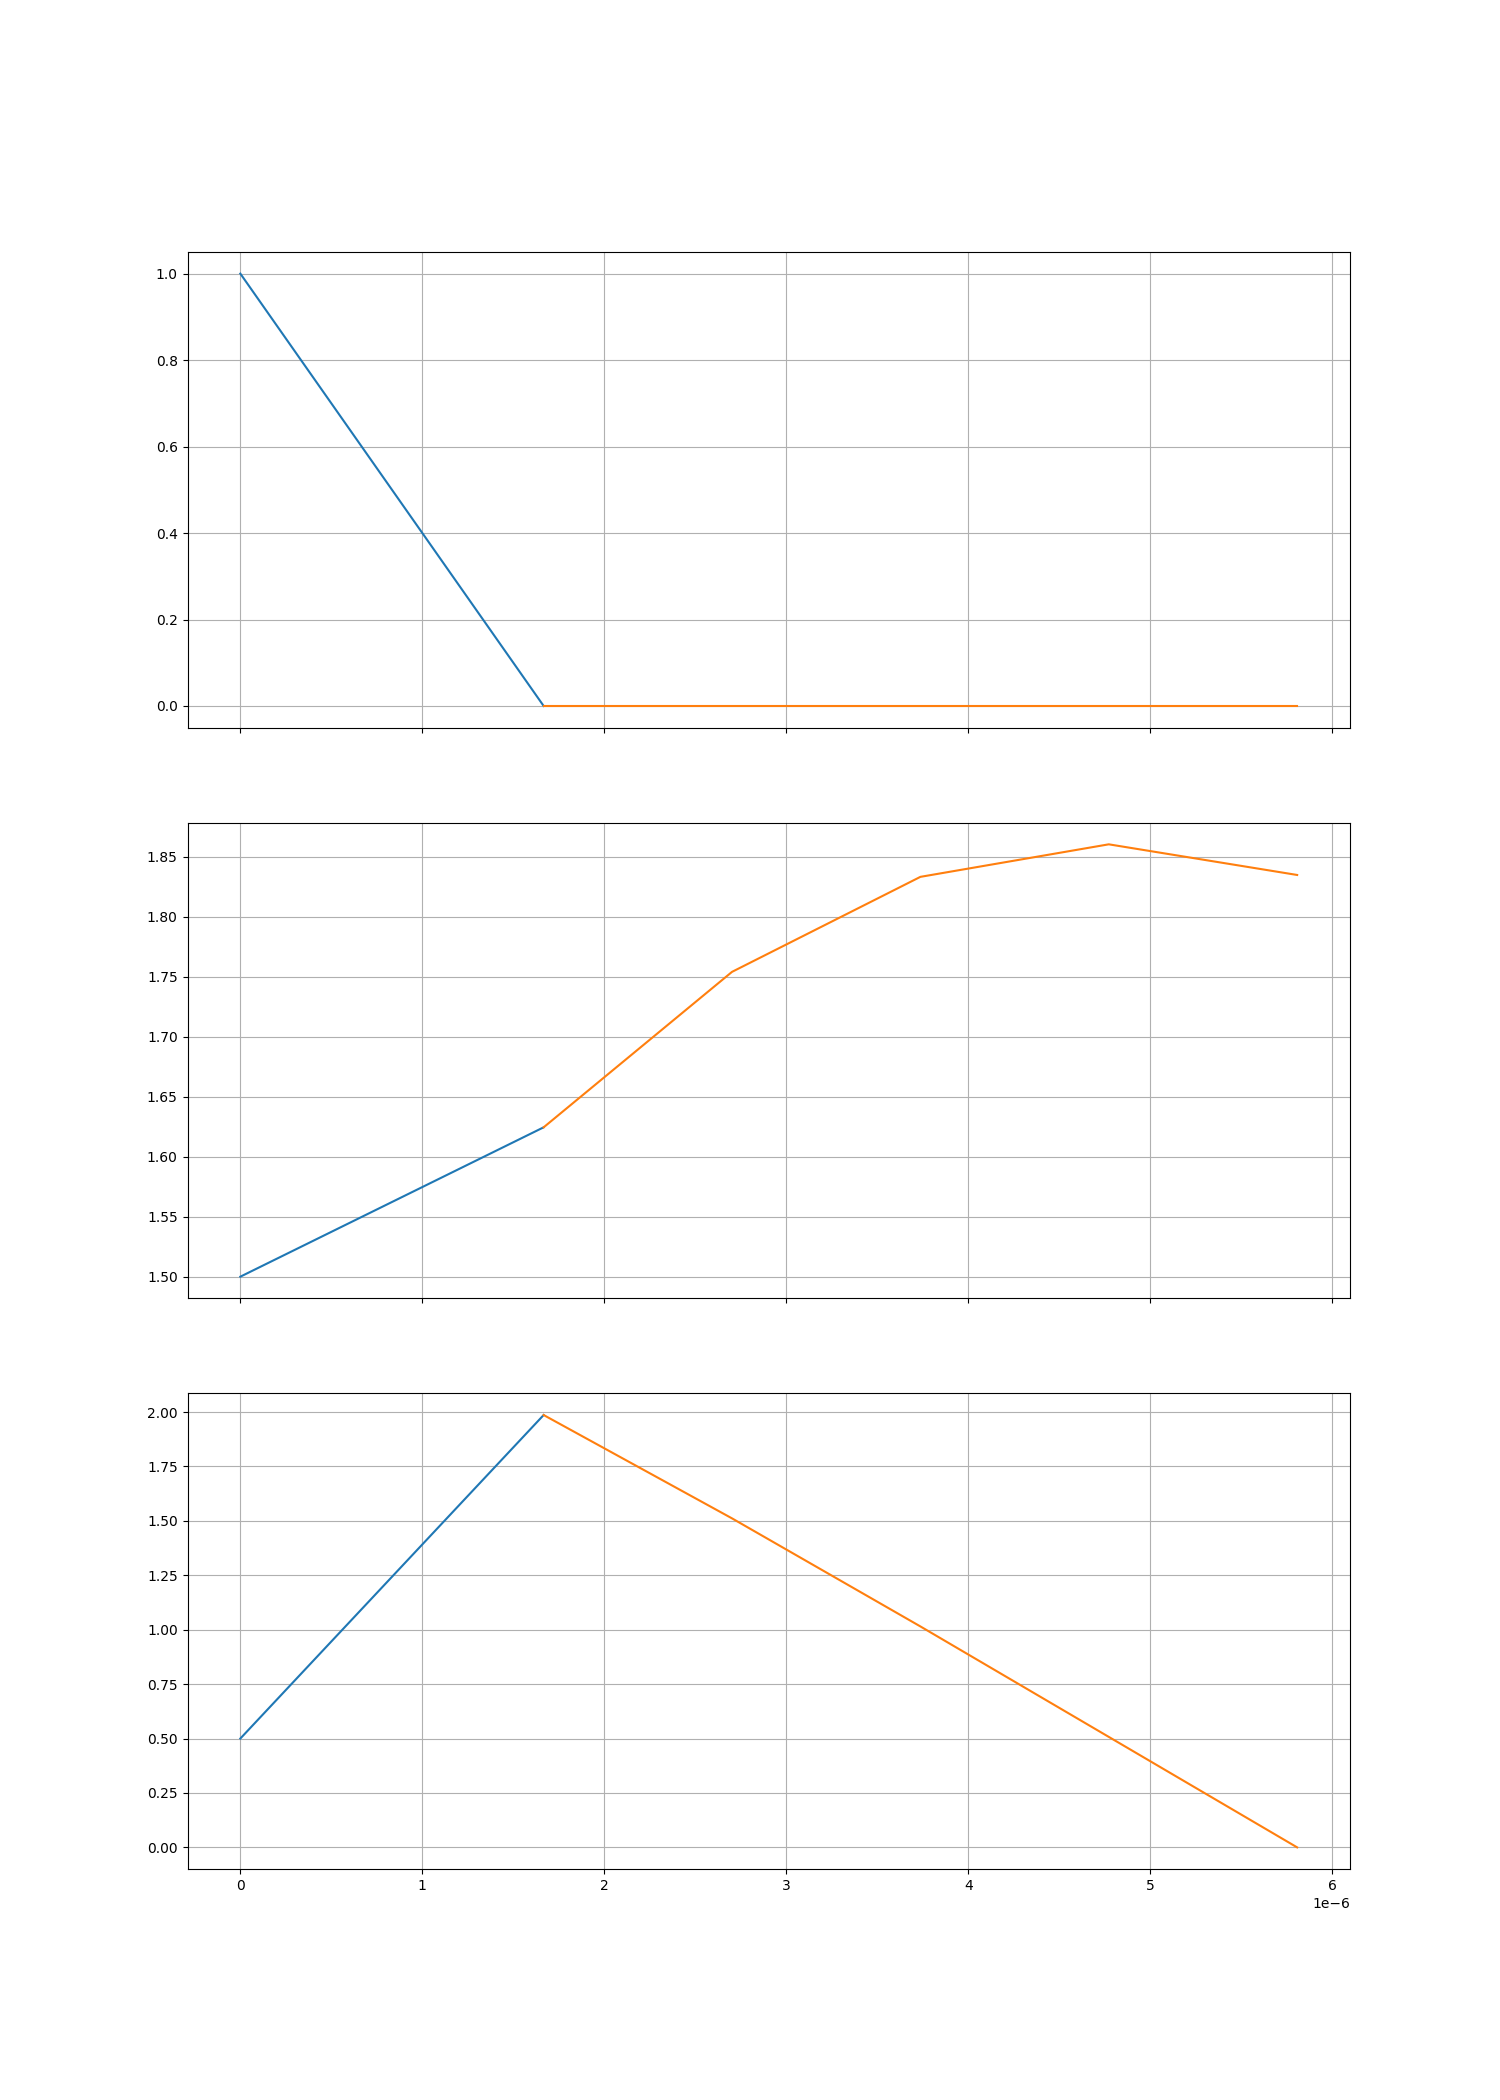

In [43]:
fig, axs = plt.subplots(3, figsize=[15, 21], sharex='all')

tmax = 1e-4
tstep = 1e-6

plotTranMeasurments(model, 0, tmax, tstep, [(t0, S > 0, "S(t)"),], axs[0])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vout, "Vout(t)"),], axs[1])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, IL, "IL(t)"),], axs[2])

for ax in axs:
    ax.grid(True)
    #ax.legend(loc="best")

plt.show()